CW_Folder_UG/Code/CNN.ipynb

Mounting the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Using CUDA if available for faster processing, otherwise using CPU (From lab 9)

In [ ]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


Recalling the Google Drive path, and checking if the files load properly

In [ ]:
import os

# TODO: Fill in the Google Drive path where you uploaded the lab materials
# Example: GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/Lab materials 01-20210104'

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/CW_Folder_UG' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['Personal_Dataset', 'Models', 'Code', 'CW_Dataset', 'test_functions.ipynb']


Copying and unzipping the dataset zip file for faster reading (from Lab 7)

In [ ]:
# Identify path to zipped dataset
zip_path = os.path.join(GOOGLE_DRIVE_PATH, 'CW_Dataset/CV2023_CW_Dataset.zip')

# Copy it to Colab
!cp '{zip_path}' .

# Unzip it
!yes|unzip -q CV2023_CW_Dataset.zip

# Delete zipped version from Colab (not from Drive)
!rm CV2023_CW_Dataset.zip

replace test/images/image_2711.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/images/image_2654.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/images/image_2438.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/images/image_2592.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/images/image_2746.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/images/image_2603.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/images/image_2480.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/images/image_2750.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/images/image_2615.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/images/image_2496.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/images/image_2479.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/images/image_2707.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/images/image_2642.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/images/image

Checking for directories and creating assigned ones for train and test if not existing yet


In [ ]:
# loading files taken from https://stackoverflow.com/questions/273192/how-can-i-safely-create-a-directory-possibly-including-intermediate-directories
from pathlib import Path
import shutil
import os

def dataFolder(trainImagePath, testImagePath):
  Path("./Data").mkdir(parents=True, exist_ok=True)
  Path("./Data/train").mkdir(parents=True, exist_ok=True)
  Path("./Data/test").mkdir(parents=True, exist_ok=True)

  # Creating folders for all labels (0-not wearing mask, 1-wearing mask properly, 2- wearing mask inproperly)
  for n in range(3):
    Path(f"./Data/train/{n}").mkdir(parents=True, exist_ok=True)
    Path(f"./Data/test/{n}").mkdir(parents=True, exist_ok=True)

  # Initialisng train and test path
  trainPath = './Data/train'
  testPath = './Data/test'

 # Reading the text file names and the number within the text file in train folder to match with the name of the image
  file_names = [file for file in os.listdir(trainImagePath) if file.endswith('.jpeg')]
  print(file_names)
  label_files = os.listdir('./train/labels')
  parsed_data = {x.removesuffix(".txt") + ".jpeg":open('./train/labels/' + x, "r").read().strip() for x in label_files}
  # Putting the images into assigned folders for train folder
  for file in file_names:
    shutil.copy(f"{trainImagePath}/{file}", f"{trainPath}/{parsed_data[file.replace('_aligned', '')]}/{file}")

 # Reading the text file names and the number within the text file in test folder to match with the name of the image
  file_names = [file for file in os.listdir(testImagePath) if file.endswith('.jpeg')]
  label_files = os.listdir('./test/labels')
  parsed_data = {x.removesuffix(".txt") + ".jpeg":open('./test/labels/' + x, "r").read().strip() for x in label_files} 
  # Putting the images into assigned folders for test folder
  for file in file_names:
    shutil.copy(f"{testImagePath}/{file}", f"{testPath}/{parsed_data[file.replace('_aligned', '')]}/{file}")


In [ ]:
# Loading the folders
dataFolder('./train/images', './test/images')

['image_0167.jpeg', 'image_0586.jpeg', 'image_2318.jpeg', 'image_0479.jpeg', 'image_0001.jpeg', 'image_1326.jpeg', 'image_0016.jpeg', 'image_0420.jpeg', 'image_0074.jpeg', 'image_1572.jpeg', 'image_1105.jpeg', 'image_0932.jpeg', 'image_1629.jpeg', 'image_2284.jpeg', 'image_1679.jpeg', 'image_0363.jpeg', 'image_0999.jpeg', 'image_0527.jpeg', 'image_0679.jpeg', 'image_1655.jpeg', 'image_1960.jpeg', 'image_2106.jpeg', 'image_1785.jpeg', 'image_0997.jpeg', 'image_1641.jpeg', 'image_0359.jpeg', 'image_2176.jpeg', 'image_1548.jpeg', 'image_1037.jpeg', 'image_0393.jpeg', 'image_0051.jpeg', 'image_1327.jpeg', 'image_0289.jpeg', 'image_2350.jpeg', 'image_0252.jpeg', 'image_1336.jpeg', 'image_0786.jpeg', 'image_0255.jpeg', 'image_1345.jpeg', 'image_1841.jpeg', 'image_0730.jpeg', 'image_1072.jpeg', 'image_1850.jpeg', 'image_1610.jpeg', 'image_0704.jpeg', 'image_1274.jpeg', 'image_0938.jpeg', 'image_0434.jpeg', 'image_1367.jpeg', 'image_1626.jpeg', 'image_1574.jpeg', 'image_0957.jpeg', 'image_0245

Importing the libraries (From lab 8 and 9)

In [ ]:
# License: BSD
# Author: Sasank Chilamkurthy
# Modified by: Giacomo Tarroni

#Library from lab 8
import torch.nn.functional as F

#Libraries from lab 9
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy


%matplotlib inline

Defining the variables for transforming data (from lab 9)

In [ ]:
data_dir = 'Data'
# Lists with the means and standard deviations
data_means = [0.485, 0.456, 0.406]
data_stds = [0.229, 0.224, 0.225]

Transforming the train and test dataset (From lab 9)

In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(data_means, data_stds)
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(data_means, data_stds)
    ]),
}

Creating image_datasets and dataloaders directories with two elements representing the train and test datasets, and applying the defined transformations (From lab 9)

In [ ]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=2)
              for x in ['train', 'test']}

In [ ]:
# Defining other variables that will be used in the later stages (From lab 9)
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}
class_names = image_datasets['train'].classes

Testing for loading train images and labels (From lab 9)

In [ ]:
print(class_names)

['0', '1', '2']


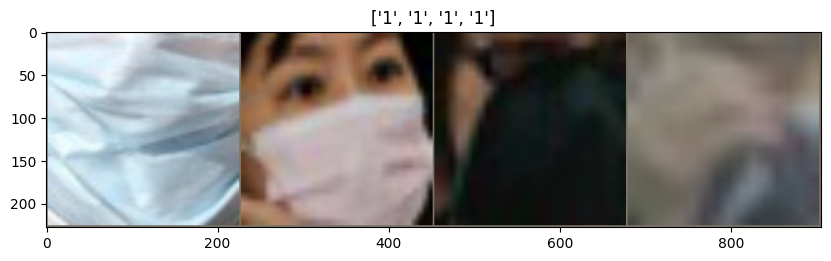

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.asarray(data_stds) * inp + np.asarray(data_means)
    inp = np.clip(inp, 0, 1)       # Clip to intensity outliers to [0, 1] range
    plt.imshow(inp)
    if title is not None:
        plt.title(title)


# Get a batch of training data
first_inputs, first_classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(first_inputs)

plt.figure(figsize=(10, 15))
imshow(out, title=[class_names[x] for x in first_classes])
plt.show()

In [ ]:
# Printing the first input layer values, the output shows batch_size of 4, 3 number of input channels RGB, and 224 for height and width
print(first_inputs.shape)

torch.Size([4, 3, 224, 224])


In [ ]:
# Defining hyper parameters for CNN
num_epochs = 25
batch_size = 4
learning_rate = 0.001

Applying Max Pooling by testing the convolutional layer values to obtain a shape suitable for the linear layer (This has been taught in module from last term IN3063 Programming and Maths for AI, Lab 8 for this module following the CIFAR 10 example and from https://www.youtube.com/watch?v=pDdP0TFzsoQ )

In [ ]:
# RGB channel, output channel size, kernel size
conv1 = nn.Conv2d(3,12,3)
# Applying 2x2 Max-pool
pool = nn.MaxPool2d(2,2)
# Creating the convolutional layers
conv2 = nn.Conv2d(12, 48,3)
conv3 = nn.Conv2d(48, 192,3)
conv4 = nn.Conv2d(192, 768, 3)

In [ ]:
# Printing the input layer values
print(first_inputs.shape)
# Applying the convolutional layers followed by pooling and printing it's values
x = conv1(first_inputs)
print(x.shape)
x = pool(x)
print(x.shape)
x = conv2(x)
print(x.shape)
x = pool(x)
print(x.shape)
x = conv3(x)
print(x.shape)
x = pool(x)
print(x.shape)
x = conv4(x)
print(x.shape)
x = pool(x)
print(x.shape)

torch.Size([4, 3, 224, 224])
torch.Size([4, 12, 222, 222])
torch.Size([4, 12, 111, 111])
torch.Size([4, 48, 109, 109])
torch.Size([4, 48, 54, 54])
torch.Size([4, 192, 52, 52])
torch.Size([4, 192, 26, 26])
torch.Size([4, 768, 24, 24])
torch.Size([4, 768, 12, 12])


Defining a Convolutional Neural Network, and then printing the model, parameters chosen based on the resources stated above (from Lab 8, IN3063, and https://www.youtube.com/watch?v=pDdP0TFzsoQ)

In [ ]:
# Implementing CNN
class ConvolutionalNeuralNetwork(nn.Module):
  def __init__(self):
        # Initializing the base class
        super(ConvolutionalNeuralNetwork, self).__init__()
        # Defining the 4 convolutional layers and 2x2 Max-Pooling
        # 3 input image channel, 12 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(3,12,3)
        # Max pooling over a (2, 2) window
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(12, 48, 3)
        self.conv3 = nn.Conv2d(48, 192,3)
        self.conv4 = nn.Conv2d(192, 768, 3)
        # Creating connected layers with nn.Linear(input size, output size)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(768*12*12, 140) # 12*12 from image dimension
        self.fc2 = nn.Linear(140,98)
        self.fc3 = nn.Linear(98,3) # As we got 3 labels

  # Forward pass implementation
  def forward(self, x):
      #Applying first convolutional layer followed by activation function (ReLU) and then pooling
      x = self.pool(F.relu(self.conv1(x)))
      #Applying second convolutional layer followed by activation function (ReLU) and then pooling
      x = self.pool(F.relu(self.conv2(x)))
      #Applying third convolutional layer followed by activation function (ReLU) and then pooling
      x = self.pool(F.relu(self.conv3(x)))
      #Applying fourth convolutional layer followed by activation function (ReLU) and then pooling
      x = self.pool(F.relu(self.conv4(x)))

      # Flattening the view to pass the fully connected layers
      x = x.view(-1, 110592) #As it's 768*12*12 from the first layer

      # Applying ReLU and fully connected layers
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))

      x = self.fc3(x)
      return x

In [ ]:
model = ConvolutionalNeuralNetwork()
print(model)

ConvolutionalNeuralNetwork(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 48, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(48, 192, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(192, 768, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=110592, out_features=140, bias=True)
  (fc2): Linear(in_features=140, out_features=98, bias=True)
  (fc3): Linear(in_features=98, out_features=3, bias=True)
)


Moving to the model to the GPU and set the remaining training parameters and criterion (From Lab 9 and IN3063 module)

In [ ]:
# Creating a model to train on and changing to GPU
model = ConvolutionalNeuralNetwork().to(device)

# Creating the loss cross entropy loss which also includes softmax
criterion = nn.CrossEntropyLoss()

# Comparing both optimizers
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
#Stopping criterion I made in IN3063 Programming and Mathematics for AI
def stop_criterion(arr):
    output = []
    for i, item in enumerate(arr):
        if i != 0:
            output.append(item-arr[i-1])
    return output

Training the model based on the code adapted from Lab 9, with additional calculations

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    #Creating empty lists to input data for losses and accuracy tracking 
    train_losses, test_losses = [], []
    train_acc, test_acc = [], []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    correct, total = 0, 0

    for epoch in range(num_epochs):
        print('----------------')
        print(f"Epoch {epoch}/{num_epochs - 1}")


        # Train and test validation phases
        for phase in ['train', 'test']:
          # Setting model to training mode
            if phase == 'train':
              model.train()
          # Setting model to evaluate mode
            else:
                model.eval()   

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                # move data to GPU
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward + optimize if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Updating statistics by calculating running_loss
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                total += labels.size(0)
                correct += (preds == labels).sum().item()

            # Update learning rate with scheduler
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            if phase == 'train':
                train_losses.append(epoch_loss)
                train_acc.append(epoch_acc)
            else:
                test_losses.append(epoch_loss)
                test_acc.append(epoch_acc)
            print(f"{phase} loss: {epoch_loss:.4f} acc: {epoch_acc:.4f}")
            
            # Stopping criteron function to stop at a designated difference value that is repeated twice
            diff = stop_criterion(train_losses[-3:])
            if len(diff) >= 2:
              if((diff[-1] > 0) and (diff[-2] > 0)):
                break

            # Update best model weights if necessary
            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

    # Print overall accuracy
    total_acc = 100.0 * correct / total
    print(f'CNN average accuracy: {total_acc:.2f}%')

    # Print time elapsed
    time_elapsed = time.time() - since
    print(f"Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s")

    # Load best model weights and return results
    model.load_state_dict(best_model_wts)
    return model, train_losses, train_acc, test_losses, test_acc
  


In [ ]:
model_ft, train_losses, train_acc, test_losses, test_acc = train_model(model, criterion, optimizer, exp_lr_scheduler,num_epochs=25)

----------------
Epoch 0/24
train loss: 0.6294 acc: 0.8509
test loss: 0.3697 acc: 0.9279
----------------
Epoch 1/24
train loss: 0.3642 acc: 0.8843
test loss: 0.3384 acc: 0.9301
----------------
Epoch 2/24
train loss: 0.4044 acc: 0.8722
test loss: 0.2795 acc: 0.9279
----------------
Epoch 3/24
train loss: 0.3646 acc: 0.8981
test loss: 0.2198 acc: 0.9301
----------------
Epoch 4/24
train loss: 0.3102 acc: 0.8926
test loss: 0.2181 acc: 0.9236
----------------
Epoch 5/24
train loss: 0.3230 acc: 0.8981
test loss: 0.2337 acc: 0.9301
----------------
Epoch 6/24
train loss: 0.3164 acc: 0.8972
test loss: 0.2268 acc: 0.9323
----------------
Epoch 7/24
train loss: 0.2792 acc: 0.9048
test loss: 0.2190 acc: 0.9323
----------------
Epoch 8/24
train loss: 0.2726 acc: 0.9073
test loss: 0.2083 acc: 0.9345
----------------
Epoch 9/24
train loss: 0.2680 acc: 0.9135
test loss: 0.2035 acc: 0.9345
----------------
Epoch 10/24
train loss: 0.2633 acc: 0.9089
test loss: 0.2054 acc: 0.9367
----------------
Epo

Visualising the model predictions (From lab 9)

In [ ]:
def visualize_model(model, num_images=4):
    was_training = model.training
    model.eval()
    images_so_far = 0

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['test']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(1, num_images, images_so_far)
                ax.axis('off')
                ax.set_title(f"Predicted: {class_names[preds[j]]}")
                imshow(inputs.cpu().data[j])        # move back the data to the CPU for visualisation

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

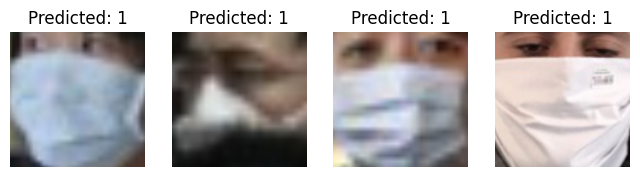

In [ ]:
plt.figure(figsize=(8, 6))
visualize_model(model_ft)
plt.show()

Creating graphs for visual representation of the values and comparison (learnt from IN3063 Programming and Maths for AI module)

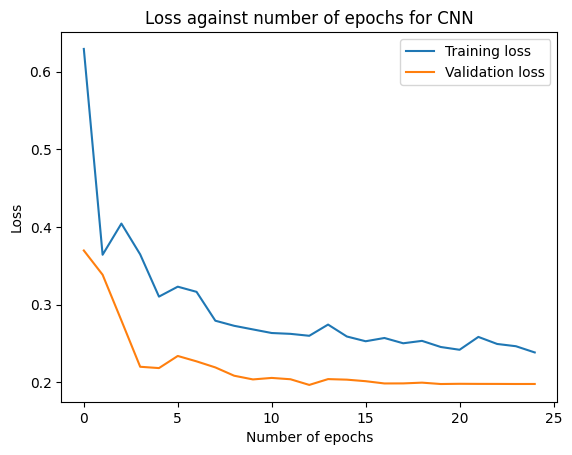

In [ ]:
# Plotting loss against epoch graph
plt.title('Loss against number of epochs for CNN')
plt.plot(train_losses, label = 'Training loss')
plt.plot(test_losses, label = 'Validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend(frameon = True)

Moving back to CPU usage to plot the accuracy graph of epochs

In [ ]:
train_accuracy = []
for i in (train_acc):
  train_accuracy.append(i.cpu())

test_accuracy = []
for i in (test_acc):
  test_accuracy.append(i.cpu())

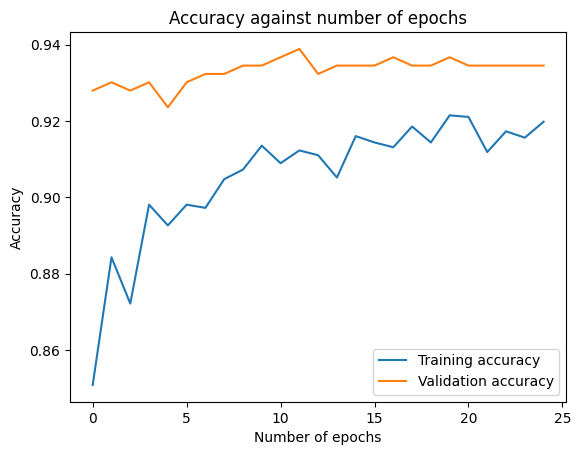

In [ ]:
# Plotting the accuracy against epoch
plt.title('Accuracy against number of epochs')
plt.plot(train_accuracy, label = 'Training accuracy')
plt.plot(test_accuracy, label = 'Validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend(frameon = True)

In [ ]:
# Saving the model via torch.save (from lab 9)
torch.save(model_ft, os.path.join(GOOGLE_DRIVE_PATH, 'Models/CNN.pth'))